In [1]:
import requests
from bs4 import BeautifulSoup
from collections import Counter

In [2]:
# 네이버 페이지 사기 크롤링
genre1 = []

for i in range(11):
    print(f'{i}페이지 분석중....')
    url1 = (f'https://search.naver.com/search.naver?display=15&f=&filetype=0&page={i+2}&query=%EC%82%AC%EA%B8%B0&research_url=&sm=tab_pge&start={i*15+1}&where=web')
    html1 = requests.get(url1)
    bs = BeautifulSoup(html1.text, 'lxml')
    bs2 = bs.find('div', {'class':'api_txt_lines'}).get_text()
    genre1.append(bs2)

0페이지 분석중....
1페이지 분석중....
2페이지 분석중....
3페이지 분석중....
4페이지 분석중....
5페이지 분석중....
6페이지 분석중....
7페이지 분석중....
8페이지 분석중....
9페이지 분석중....
10페이지 분석중....


In [3]:
print(genre1)

['사기(詐欺)는 사실을 오인시키는 등의 방법으로 남을 기망해서(속여서) 경제적 이득을 얻거나 다른 사람으로 하여금 얻게 하는 행위이다. 경우에 따라 민사상 책임이 부여되고, 후술할 사기죄로 처벌을 받을 수 있다.', "간편하게 거래가 가능한 중고 거래 시스템 이런 번개장터에도 단점은 존재했는데요, 그것 바로 '사기'에 대한 위험성입니다. 오늘은 모바일 중고거래 플랫폼 '번개장터'의 '사기... 그러다 보니 악의적인 의도를 가지고 돈만 받고 물건은 보내주지 않은 '사기'라는 일이 발생하기도 합니다. 중고 거래에서 사기를 당해 벽돌 받지 말자 (출처: 위키백과) 그렇다면... ", '사기꾼,사기꾼리스트,사기꾼목록,사기,사기당했어요,사기당했을때,사기대처법,중고,중고물품,중고거래,더치트,인터넷사기,보이스피싱,스미싱,메신저피싱,몸캠피싱,인터넷도박,성매매', '직업적(?)으로 사기를 치고 다니는 사람을 사기꾼이라고 부른다. 다른 범죄자들은 거의 대부분 -범(ex : 절도범, 강간범)이라고 부르거나 흉악범죄의 경우 -마(ex : 살인마)라고 부르는데 사기꾼만은 -꾼이라고 부른다. 절도꾼이나 살인꾼이란 말을 들어본 사람은 없을 것이다.', '단비 청소년 교양 왈 시리즈 3권. 고통과 수치 속에서 저작을 완성해, 끝내 역사의 아버지(歷史之父)라는 불멸의 이름을 얻은 사마천의 삶과 그가 남긴 <사기>의 몇몇 이야기를 선별해 옛사람들과 그들의 삶을...', '▲ 주요 포털 사이트에서도 아이템 사기를 당해 도와달라는 다수의 요청을 확인할 수 있다 (사진출처: 네이버 지식인) 즐기기 위해서 하는 게임, 하지만 억울한 일을 당하는 경우도 종종... 다양한 사례 중 대표적인 케이스라 할 수 있는 <아이템 거래 사기> <채팅 피해> <모바일게임 환불 대행 사기> 세 가지를 집중적으로 알아보는 시간을 마련했다. ▲ 한국콘텐츠진흥원... ', '아래 팁을 참고하여 신용 사기를 방지하고 의심스러운 이메일, 전화 또는 기타 메시지를 받는 경우 수행할 작업에 대해 알아봅니다.', '반성문 > 사

In [4]:
from konlpy.tag import Okt

okt = Okt()
noun_adj_list = []
for data in genre1:
    sentences_tag = okt.pos(data)
    # tag가 명사인 단어들만 noun_adj_list에 넣어준다.
    for word, tag in sentences_tag:
        if tag in ['Noun']:
            noun_adj_list.append(word)

In [7]:
noun_adj_list
counts = Counter(noun_adj_list)
tags = counts.most_common(50)
tags

[('사기', 20),
 ('수', 6),
 ('거래', 6),
 ('중고', 6),
 ('친환경', 6),
 ('구실', 6),
 ('국민', 6),
 ('값', 6),
 ('재생에너지', 6),
 ('사기꾼', 5),
 ('사람', 4),
 ('경우', 4),
 ('한국', 4),
 ('부도', 4),
 ('회사', 3),
 ('그린피스', 3),
 ('창립', 3),
 ('탈', 3),
 ('원전', 3),
 ('폰', 3),
 ('패', 3),
 ('트릭', 3),
 ('무어', 3),
 ('박사', 3),
 ('쓴소리', 3),
 ('청구', 3),
 ('좌파', 3),
 ('정부', 3),
 ('시민단체', 3),
 ('환경', 3),
 ('정치', 3),
 ('도구', 3),
 ('태양광', 3),
 ('풍력', 3),
 ('에너지', 3),
 ('전환', 3),
 ('세뇌', 3),
 ('사', 3),
 ('속', 2),
 ('다른', 2),
 ('사기죄', 2),
 ('번개', 2),
 ('장터', 2),
 ('모바일', 2),
 ('의', 2),
 ('의도', 2),
 ('가지', 2),
 ('말', 2),
 ('출처', 2),
 ('인터넷', 2)]

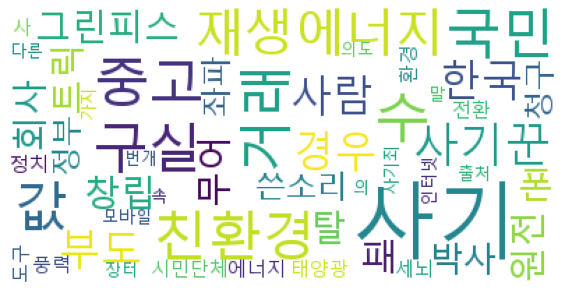

In [8]:
# WordCloud를 생성한다.
from wordcloud import WordCloud
import platform
import matplotlib.pyplot as plt

if platform.system() == 'Windows':
    path = r'c:\Windows\Fonts\malgun.ttf'
elif platform.system() == 'Darwin': # Mac OS
    path = r'/System/Library/Fonts/AppleGothic'
else:
    path = r'/usr/share/fonts/truetype/name/NanumMyeongjo.ttf'

wc = WordCloud(font_path=path, background_color="white", max_font_size=60)
cloud1 = wc.generate_from_frequencies(dict(tags))

# 생성된 WordCloud를 test.jpg로 보낸다.
#cloud.to_file('test.jpg')

plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud1)
plt.show()

In [9]:
# 네이버 페이지 횡령 크롤링
genre2 = []

for i in range(11):
    print(f'{i}페이지 분석중....')
    url1 = (f'https://search.naver.com/search.naver?display=15&f=&filetype=0&page={i+2}&query=%ED%9A%A1%EB%A0%B9&research_url=&sm=tab_pge&start={i*15+1}&where=web')
    html1 = requests.get(url1)
    bs3 = BeautifulSoup(html1.text, 'lxml')
    bs5 = bs3.find('div', {'class':'api_txt_lines'}).get_text()
    genre2.append(bs5)

0페이지 분석중....
1페이지 분석중....
2페이지 분석중....
3페이지 분석중....
4페이지 분석중....
5페이지 분석중....
6페이지 분석중....
7페이지 분석중....
8페이지 분석중....
9페이지 분석중....
10페이지 분석중....


In [10]:
print(genre2)

['횡령(橫領 / embezzlement)은 타인의 재물을 보관하는 자가 그 타인의 재물을 유용하거나 반환을 거부하는 행위이다. 흔히 빼돌리기라는 표현을 사용하며, 속된 말로 삥땅, 슈킹, 긴빠이라고도 부른다.', '2021년오스템임플란트의 자금관리 팀장인 직원 이은식 (45세, 1977년생)이 자본금의 108.18%에 달하는 2,215억 원의 거액을 빼돌린 사건이다.', '횡령, 폭행, 모욕, 감금, 명예훼손, 문서위조, 강제추행…. 2013년 1월 1일에서 올 7월 29일 사이...', '박수홍의 친형 박진홍이 박수홍의 출연료를 지급하지 않고 추정 100억 원 이상의 재산을 빼돌린 횡령 의혹 사건을 서술한 문서다.', '회삿돈 2천215억원을 횡령한 오스템임플란트 직원 이모(45)씨의 아버지(69)가 실종돼 경찰이 수색 ...', "'700억 횡령' 우리은행도 금감원도 몰랐다, 금감원, 검사 결과 발표 직원, 8년간 697.3억 빼돌려 은행선 13개월 무단결근도 몰라 직인 도용·공사문서 수차례 위조 우리銀 내부통제 작동 안해 적발 못한 '금감원 책임론'도 제기 당국, 법률검토 후 제재수위 결정", '614억원을 횡령한 혐의로 고소된 우리은행 직원이 50억원을 더 빼돌렸던 것이 금융감독원 조사 ...', '오스템임플란트 8년 전 100억대 횡령사건 또 있었다 오스템임플란트 1880억원 횡령한 사실이 발각되면서 코스닥시장에서 주식 거래가 중지된 오스템임플란트가 8년 전에도 대표이사의 횡령혐의로 거래중지됐던 사실 등이 회자되고 있다. 4일 금융투자업계에 따르면 오스템임플란', '`역대급 횡령` 오스템임플란트, 거래정지에도 시총 순위 껑충…왜?, 작성자-이가람, 요약-역대급 횡령 사건으로 주식 거래가 정지된 오스템임플란트의 시가총액 순위가 상승했다. 최근 폭락장세 속에서 다른 종목들의 주가가 하락하면서 반사이익을 본 것이다. 29일 한국거래소에 따르면 현재 오스템임플란트의 주가는 주당 14만27', '모든 횡령과 자산관리는 본인이 했다고 주장하고 있다. 친족상도례

In [11]:
from konlpy.tag import Okt

okt = Okt()
noun_adj_list = []
for data in genre2:
    sentences_tag = okt.pos(data)
    # tag가 명사인 단어들만 noun_adj_list에 넣어준다.
    for word, tag in sentences_tag:
        if tag in ['Noun']:
            noun_adj_list.append(word)

In [12]:
noun_adj_list
counts = Counter(noun_adj_list)
tags = counts.most_common(50)
tags

[('횡령', 17),
 ('스템', 8),
 ('임플란트', 7),
 ('혐의', 6),
 ('것', 6),
 ('직원', 4),
 ('원', 4),
 ('빼', 4),
 ('사건', 4),
 ('박수홍', 4),
 ('거래', 4),
 ('박씨', 4),
 ('관리', 3),
 ('달', 3),
 ('출연료', 3),
 ('아버지', 3),
 ('금감원', 3),
 ('등', 3),
 ('은', 2),
 ('타인', 2),
 ('재물', 2),
 ('속', 2),
 ('세', 2),
 ('문서', 2),
 ('위조', 2),
 ('우리은행', 2),
 ('전', 2),
 ('사실', 2),
 ('주식', 2),
 ('역대', 2),
 ('정지', 2),
 ('순위', 2),
 ('주가', 2),
 ('모든', 2),
 ('자산', 2),
 ('본인', 2),
 ('주장', 2),
 ('친족상도례', 2),
 ('악용', 2),
 ('설명', 2),
 ('특정', 2),
 ('경제범죄', 2),
 ('가중', 2),
 ('처벌', 2),
 ('법', 2),
 ('형사', 2),
 ('부', 2),
 ('송치', 2),
 ('매니지먼트', 2),
 ('법인', 2)]

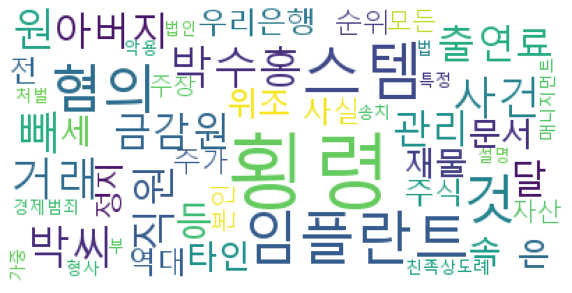

In [13]:
# WordCloud를 생성한다.
from wordcloud import WordCloud
import platform
import matplotlib.pyplot as plt

if platform.system() == 'Windows':
    path = r'c:\Windows\Fonts\malgun.ttf'
elif platform.system() == 'Darwin': # Mac OS
    path = r'/System/Library/Fonts/AppleGothic'
else:
    path = r'/usr/share/fonts/truetype/name/NanumMyeongjo.ttf'

wc = WordCloud(font_path=path, background_color="white", max_font_size=60)
cloud1 = wc.generate_from_frequencies(dict(tags))

# 생성된 WordCloud를 test.jpg로 보낸다.
#cloud.to_file('test.jpg')

plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud1)
plt.show()

In [14]:
import pandas as pd